<a href="https://colab.research.google.com/github/anoshyn/naive-bayes/blob/main/as.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Мережі Байєса

Наївний баєсів класифікатор - це простий імовірнісний класифікатор, заснований на застосуванні теореми Баєса (з баєсівської статистики) з припущеннями (наївними) про незалежність. Простіше кажучи, наївний класифікатор Баєса припускає, що наявність (або відсутність) певної ознаки  об’єкта не пов'язані з наявністю (або відсутністю) будь-якої іншої ознаки.

Наприклад, плід може вважатися яблуком, якщо він червоний, круглий і діаметром близько десяти сантиметрів. Навіть якщо ці ознаки яблука залежать один від одного або від існування інших ознак, наївний класифікатор Баєса вважає,що всі ці властивості незалежно сприяють тому, щоб цей плід класифікувався як яблуко.

# 1.  Постановка задачі моделювання

Виконати аналіз вхідних даних та встановити наявність причинно-наслідкового зв’язку між компонентами даних.

Файл `loan_data.csv` містить дані про 614 клієнтів. Дані включають інформацію про клієнта (стать, дохід тощо), стосунки клієнта з банком (кредитна історія), а також реакцію банку на останню кампанію персональних позик (Loan Status). Серед цих 614 клієнтів 422 клієнтам (= 69%) схвалили особисту позику, що були розглянуті у попередній кампанії.

У наборі даних є порожні або (NaN) значення. Набір даних має поєднання числових і категоріальних атрибутів, але `Credit_History`, що є категоріальною ознакою, представлений числом.

Нижче наведено **структуру набору даних**:

<table style="width:100%">
<thead>
<tr>
<th style="text-align:center; font-weight: bold; font-size:20px">Назва змінної</th>
<th style="text-align:center; font-weight: bold; font-size:20px">Опис</th>
<th style="text-align:center; font-weight: bold; font-size:20px">Приклад даних</th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:left"><b>Loan_ID</b></td>
<td style="text-align:left">Унікальний ідентифікаційний номер позики</td>
<td style="text-align:left">LP001002, LВ001012, ...</td>
</tr>
<tr>
<td style="text-align:left"><b>Gender</b></td>
<td style="text-align:left">Стать</td>
<td style="text-align:left">Male, Female</td>
</tr>
<tr>
<td style="text-align:left"><b>Married</b></td>
<td style="text-align:left"><br>Сімейний статус <br> (Yes: Married; No: Not married)</td>
<td style="text-align:left">Yes, No</td>
</tr>
<tr>
<td style="text-align:left"><b>Dependents</b></td>
<td style="text-align:left">Кількість залежних від клієнта осіб</td>
<td style="text-align:left">0, 1, 3, 3+</td>
</tr>
<tr>
<td style="text-align:left"><b>Education</b></td>
<td style="text-align:left">Освіта клієнта</td>
<td style="text-align:left">Graduate, Not Graduate</td>
</tr>
<tr>
<td style="text-align:left"><b>Self_Employed</b></td>
<td style="text-align:left">Cамозайнятий</td>
<td style="text-align:left">Yes, No</td>
</tr>
<tr>
<td style="text-align:left"><b>ApplicantIncome</b></td>
<td style="text-align:left">Дохід клієнта</td>
<td style="text-align:left">6633, 7142, ...</td>
</tr>
<tr>
<td style="text-align:left"><b>CoapplicantIncome</b></td>
<td style="text-align:left">Дохід співзаявника</td>
<td style="text-align:left">0.0, 1400.0, ...</td>
</tr>
<tr>
<td style="text-align:left"><b>LoanAmount</b></td>
<td style="text-align:left">Сума позики в тисячах</td>
<td style="text-align:left">NaN, 138.0, ...</td>
</tr>
<tr>
<td style="text-align:left"><b>Loan_Amount_Term</b></td>
<td style="text-align:left">Термін кредиту в місяцях</td>
<td style="text-align:left">360.0, 480.0, ...</td>
</tr>
<tr>
<td style="text-align:left"><b>Credit_History</b></td>
<td style="text-align:left">Кредитна історія відповідає вимогам<br>(Так: 0; Ні: 1)</td>
<td style="text-align:left">0, 1</td>
</tr>
<tr>
<td style="text-align:left"><b>Property_Area</b></td>
<td style="text-align:left">Місце проживання (міський/напів- та сільський)</td>
<td style="text-align:left">Urban, Semiurban, Rural</td>
</tr>
<tr>
<td style="text-align:left"><b>Lona_Status</b></td>
<td style="text-align:left">Позика схвалена</td>
<td style="text-align:left">Yes, No</td>
</tr>
</tbody>
</table>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Read the data
data = pd.read_csv('loan_data.csv')

In [ ]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Згідно з вищенаведеною інформацією:
*  Набір даних містить 614 записів.
*  Набір даних складається з 13 стовпців, зокрема:
    *  8 стовпців за типом object: `Loan_ID`, `Gender`, `Married`, `Dependents`, `Education`, `Self_Employed`, `Property_Area`, `Loan_Status` 
    *  5 стопців за типом int64, float64: `ApplicantIncome`, `CoapplicantIncome`, `LoanAmount`, `Loan_Amount_Term`, `Credit_History`
*  Target – це стовпець `Loan_Status`, а інші стовпці – features.
*  Здається, є пропущені значення, тому ми будемо заповнювати пропущені значення деяким числом або об'єктом.

In [ ]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
data.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


Начебто із значеннями все гаразд, немає негативних або аномальних значень у наборі даних. 

# 2. Навчальні дані

Розбити навчальні дані на навчальну та перевірочну вибірку. В якості навчальної вибірки використати 90% даних, а для перевірки якості моделі використати 10% вибірки.

In [ ]:
# We will drop ID because it's not important for our model and it will just mislead the model
data.drop('Loan_ID', axis=1, inplace=True)

# We will change the type of Credit_History to object becaues we can see that it is 1 or 0
data['Credit_History'] = data['Credit_History'].astype('O')

# Remove rows with missing target, separate target from predictors
data.dropna(axis=0, subset=['Loan_Status'], inplace=True)
y = data.Loan_Status
X = data.drop(['Loan_Status'], axis=1)

# Divide data into training and validation subsets
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.9, test_size=0.1,
                                                                random_state=42)

# Select categorical columns
categorical_cols = [cname for cname in X_train_full.columns if
                    X_train_full[cname].nunique() < 10 and 
                    X_train_full[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in X_train_full.columns if
                  X_train_full[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
my_cols = categorical_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()

In [ ]:
# Shape of training data (num_rows, num_columns)
print(X_train.shape)

# Number of missing values in each column of training data
missing_val_count_by_column = (X_train.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

(552, 11)
Gender              13
Married              2
Dependents          12
Self_Employed       29
Credit_History      45
LoanAmount          20
Loan_Amount_Term    14
dtype: int64


Шкода, маємо пропущені значення. Давайте почнемо заповнювати їх деякими числами або категоріями. 

## Одновимірний аналіз 

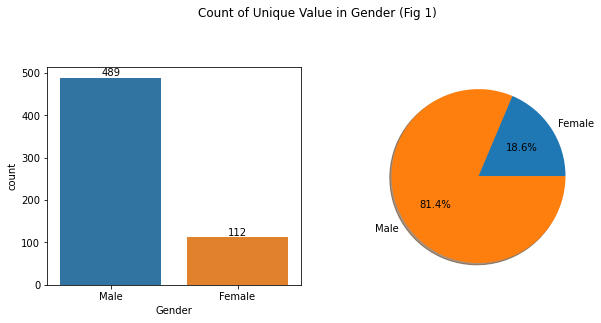

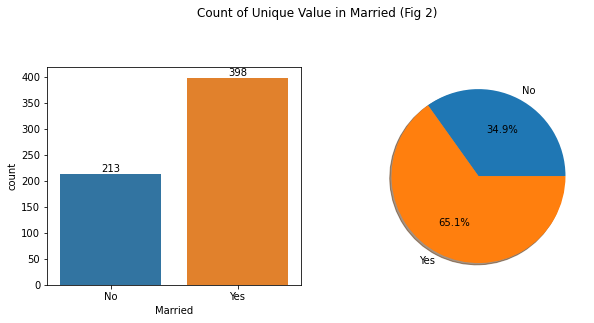

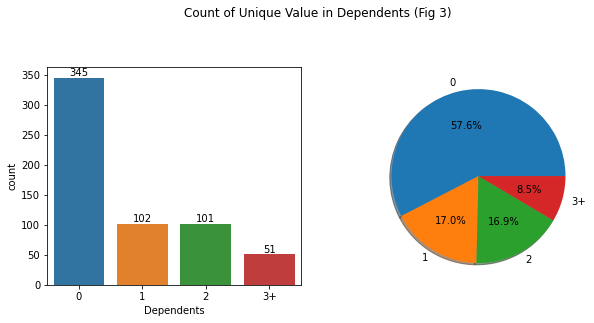

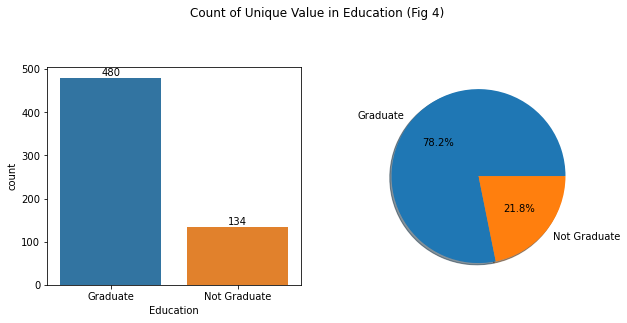

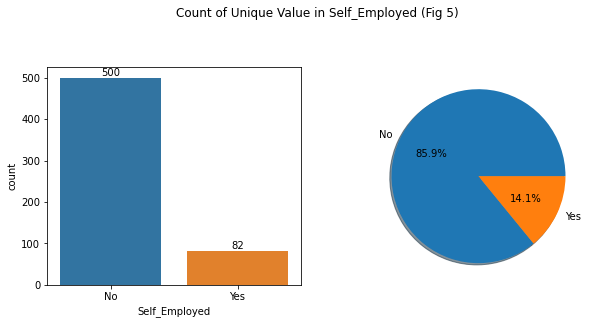

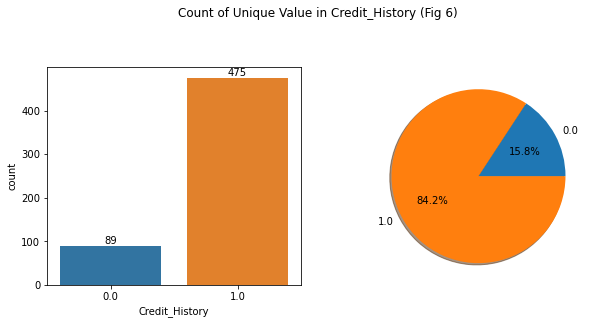

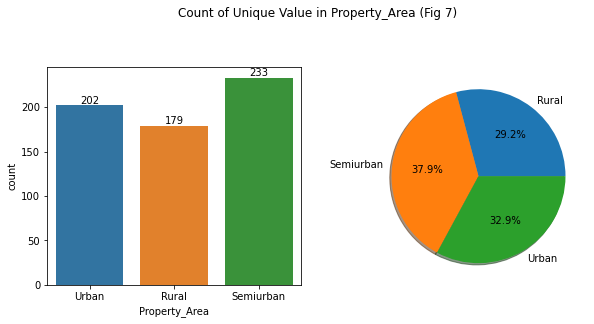

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# univariate analysis of categorical data:
for i, col in enumerate(categorical_cols):

    fig, axes = plt.subplots(1,2,figsize=(10,4))

    # count of col (countplot)
    sns.countplot(data=X, x=col, ax=axes[0])
    for container in axes[0].containers:
        axes[0].bar_label(container)
    # count of col (pie chart)
    slices = X[col].value_counts().sort_index().values
    activities = [var for var in X[col].value_counts().sort_index().index]
    axes[1].pie(slices, labels=activities, shadow=True, autopct='%1.1f%%')

    plt.suptitle(f'Count of Unique Value in {col} (Fig {i+1})', y=1.09)
    plt.show()

👉 Відповідно до наведених вище графіків:
*  Більшість клієнтів банку (81,4%) чоловіки (рис. 1).
*  Більшість клієнтів банку (65,1%) одружені/замужні (рис. 2).
*  Клієнти без залежних осіб, мають найвищу частоту, а клієнти із більше, ніж трьома особами, мають найнижчу частоту. (рис. 3)
*  Більшість клієнтів банку (78,2%) мають вищу середню або вищу освіту (рис. 4).
*  Більшість клієнтів банку (85,9%) не самозайняті (не підприємець) (рис. 5).
*  Більшість клієнтів банку (84,2%) користувалися послугою кредитування (рис. 6).
*  Клієнти, які проживають в передмісті, мають найвищу частоту, а клієнти, що проживають у сільській місцевості, мають найнижчу частоту, але загалом клієнти з пригороду, сільської місцевості та міста однаково розподілені в наборі даних (рис. 7).

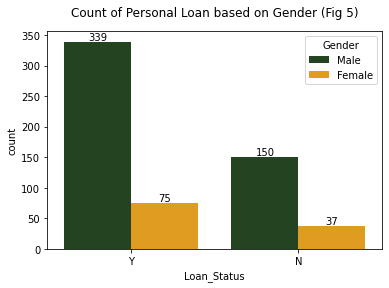

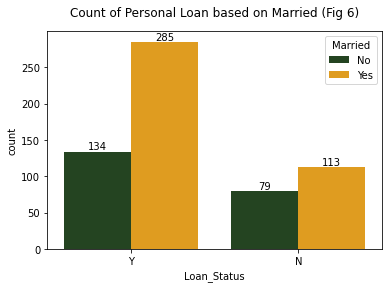

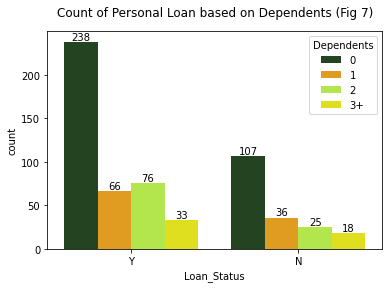

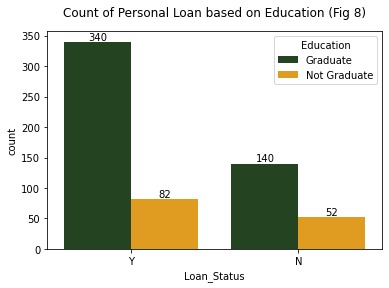

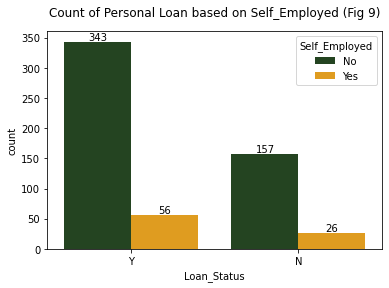

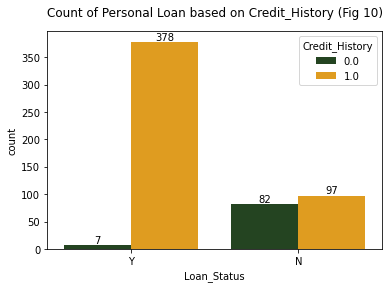

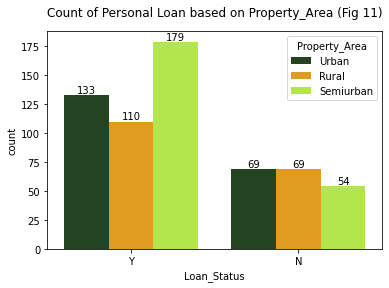

In [ ]:
# count of purchased based on Gender
%matplotlib inline
sns.set_palette(['#1f4a1b','orange','#bbff33','yellow'])
for i, col in enumerate(categorical_cols):
    ax = sns.countplot(data=data, x='Loan_Status', hue=col)
    for container in ax.containers:
        ax.bar_label(container)
    plt.title(f'Count of Personal Loan based on {col} (Fig {i+5})', pad=15)
    plt.show()

👉 Відповідно до наведених вище графіків:
*  Більшість людей, як тих, хто прийняв особисту позику, так і тих, хто не прийняв, чоловічої статі (рис. 5).
*  Більшість людей, як тих, хто прийняв особисту позику, так і тих, хто не прийняв, перебувають у шлюбі, але можна помітити, що люди у шлюбі більш схильні приймати її, ніж її не приймати (рис. 6).
*  Більшість людей, як тих, хто прийняв особисту позику, так і тих, хто не прийняв, не мають залежних осіб, цікаво, що клієнти із двома залежними особами, більш схильні приймати позику, ніж її не приймати (рис. 7). 
*  Більшість людей, як тих, хто прийняв особисту позику, так і тих, хто не прийняв, мають середню або вищу освіту (рис. 8).
*  Більшість людей, як тих, хто прийняв особисту позику, так і тих, хто не прийняв, не самозайняті (не підприємець) (рис. 9).
*  Серед людей, які прийняли особисту позику, майже усі мали кредитну історію, але серед людей, які не прийняли особисту позику, немає великої різниці за кредитною історією (рис. 10).
*  Серед людей, які прийняли особисту позику, більшість проживає у передмісті, але серед людей, які не прийняли особисту позику, немає великої різниці за місцем проживання (рис. 11).

============================== Mean of ApplicantIncome in each categorical feature ==============================


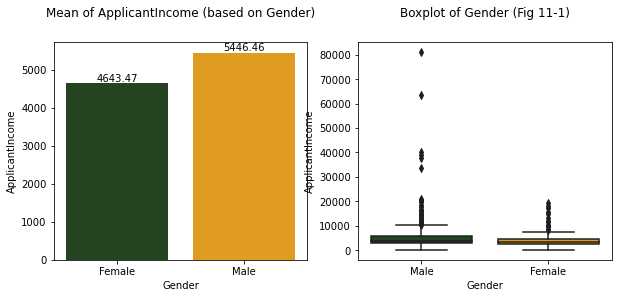

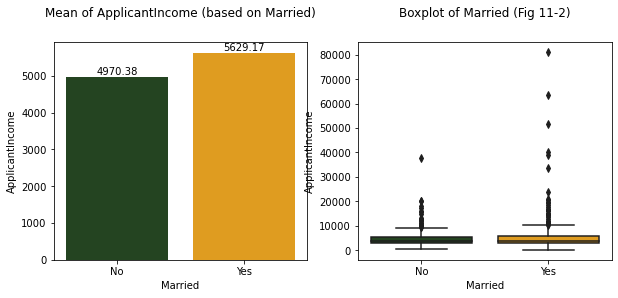

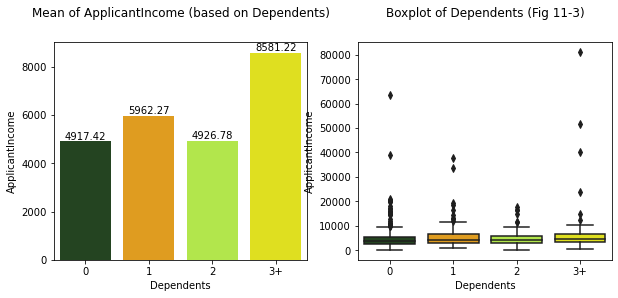

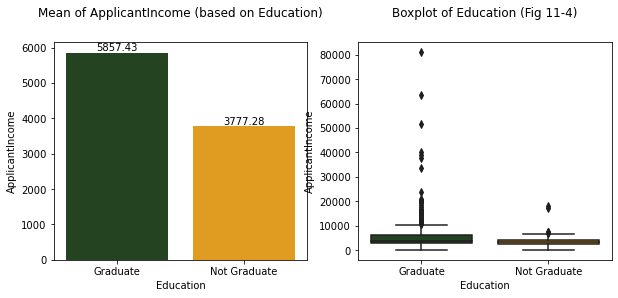

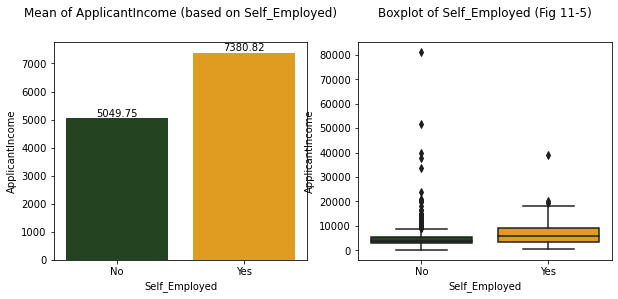

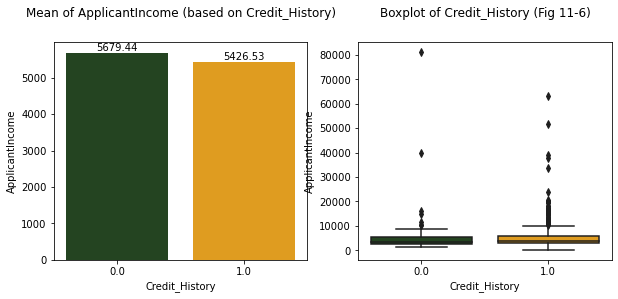

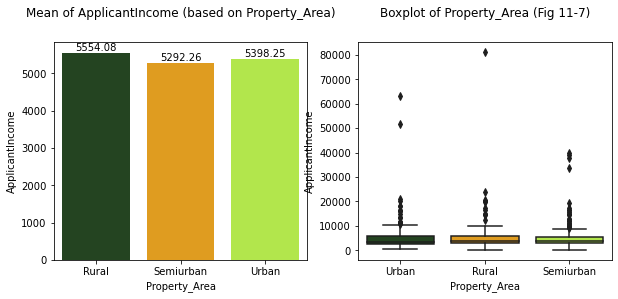

============================== Mean of CoapplicantIncome in each categorical feature ==============================


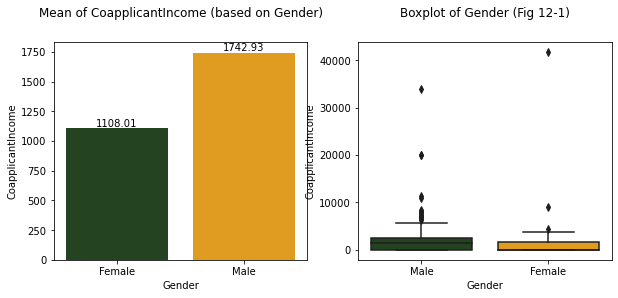

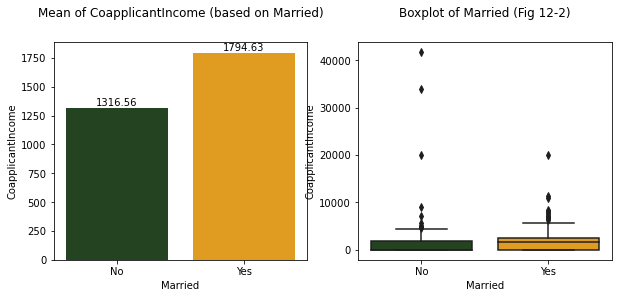

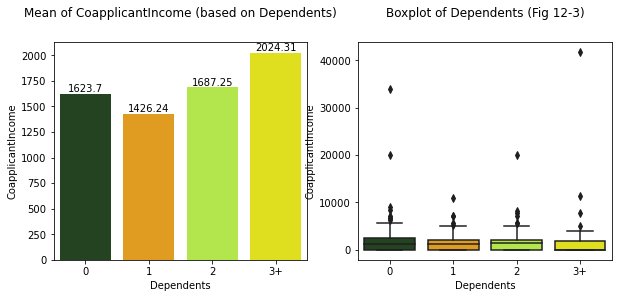

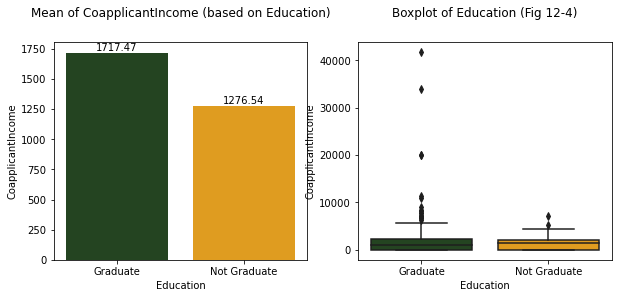

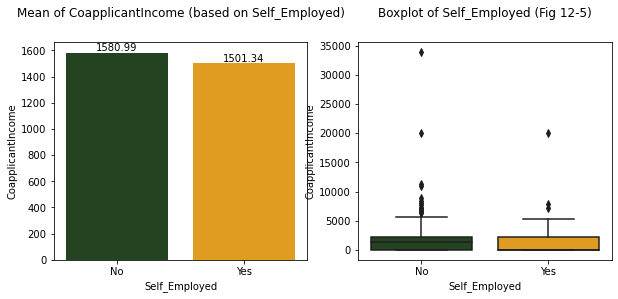

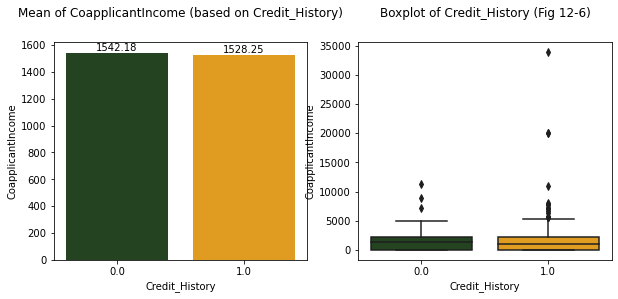

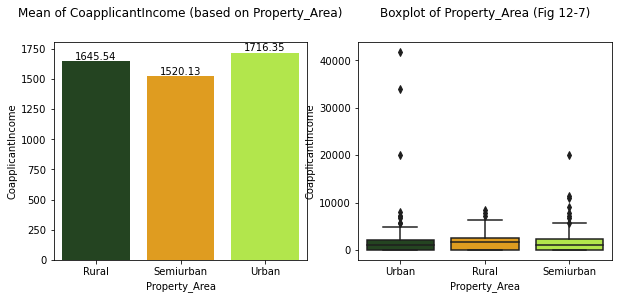

============================== Mean of LoanAmount in each categorical feature ==============================


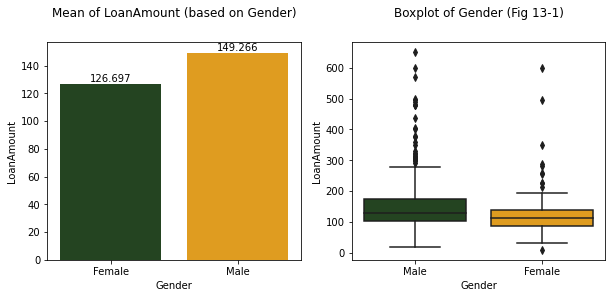

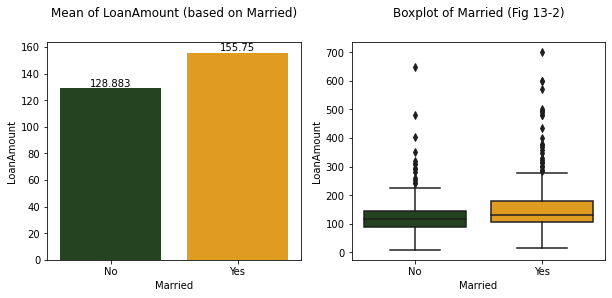

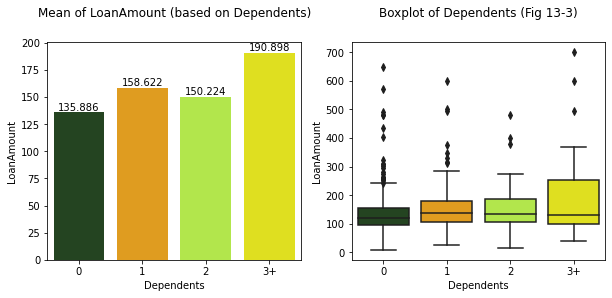

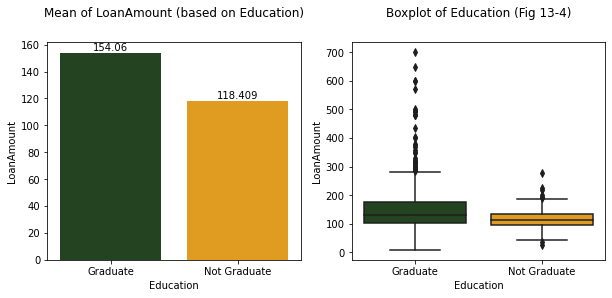

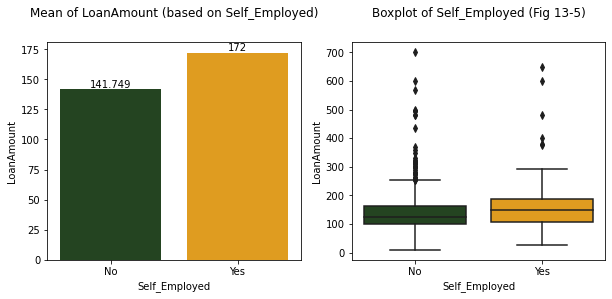

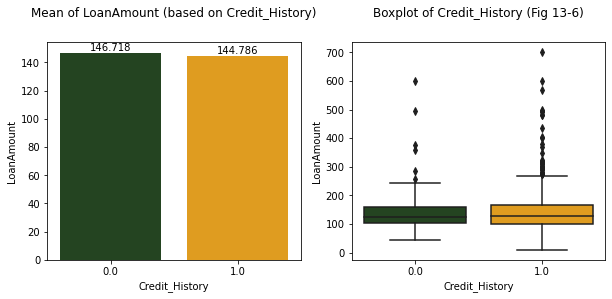

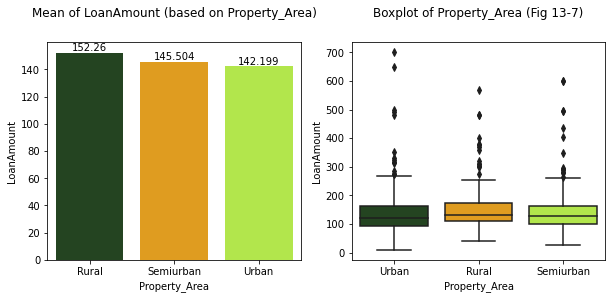

============================== Mean of Loan_Amount_Term in each categorical feature ==============================


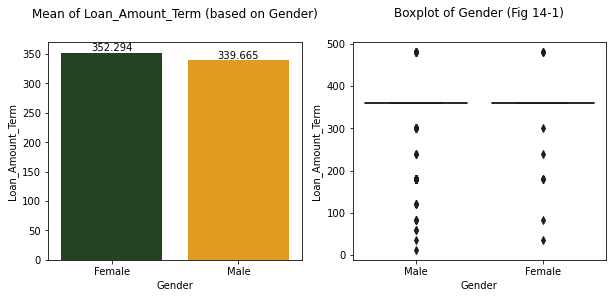

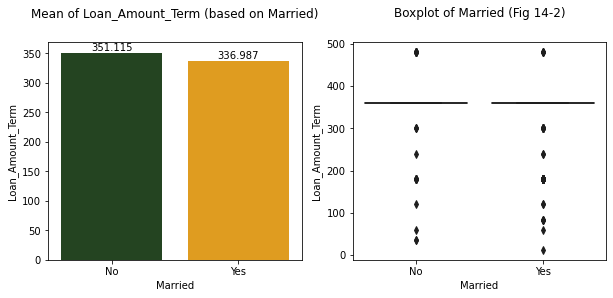

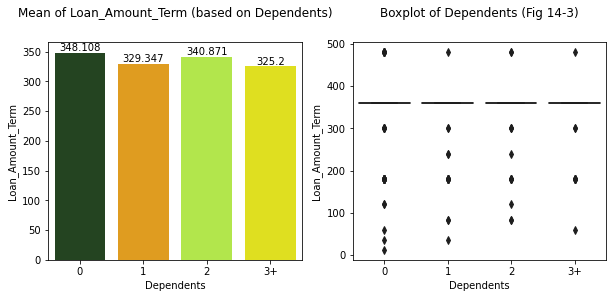

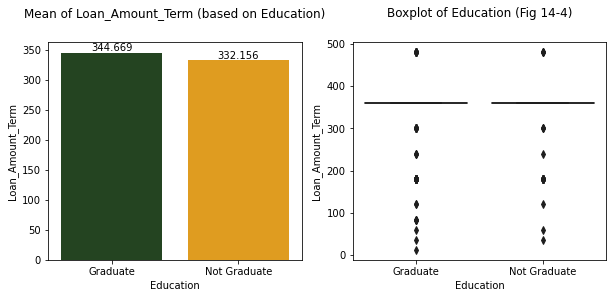

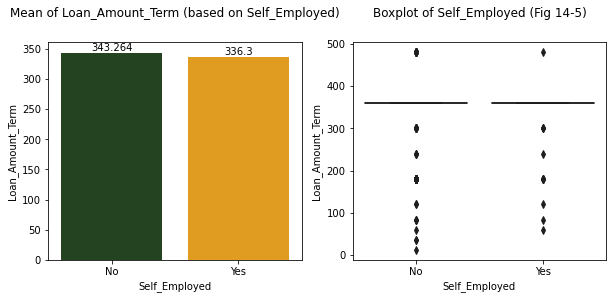

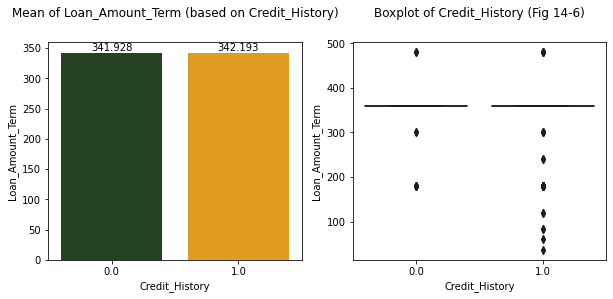

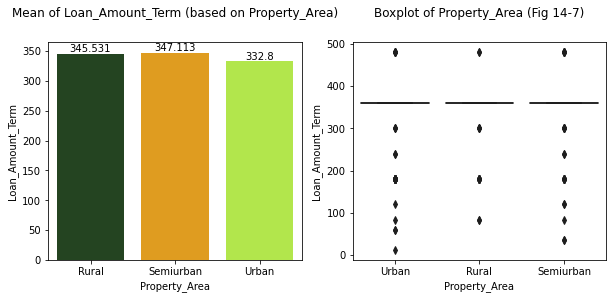

In [ ]:
# Mean of Income and CCAvg based on each feature
for i, col in enumerate(numerical_cols):
    print('='*30, f"Mean of {col} in each categorical feature", '='*30)
    for j, cat in enumerate(categorical_cols):
        fig , ax= plt.subplots(1,2, figsize=(10,4))
        gp = X.groupby([cat])[col].mean().to_frame().reset_index()
        sns.barplot(data=gp, x=cat, y=col, ax=ax[0])
        for container in ax[0].containers:
            ax[0].bar_label(container)
        ax[0].set_title(f'Mean of {col} (based on {cat})', y=1.09)

        sns.boxplot(data=X, x=cat, y=col, ax=ax[1])
        ax[1].set_title(f'Boxplot of {cat} (Fig {i+11}-{j+1})', y=1.09)

        plt.show()

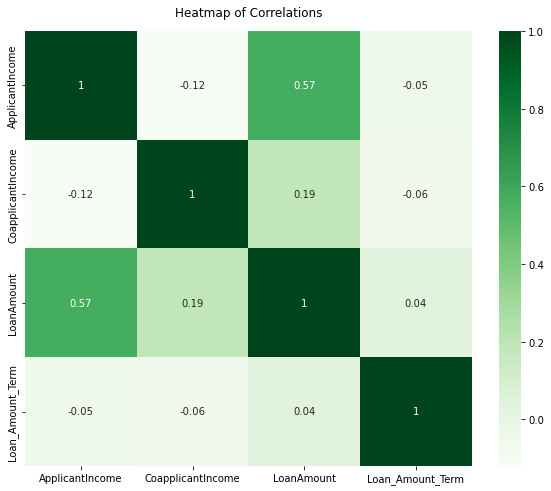

In [ ]:
# draw heatplot of correlation between columns
plt.figure(figsize=(10,8))
sns.heatmap(round(X.corr(),2), cmap='Greens', annot=True)
plt.title('Heatmap of Correlations', y=1.02)
plt.show()

👉 Відповідно до наведених вище графіків:
*  Середній дохід клієнтів не сильно змінюється для таких ознак: стать, сімейний статус, кредитна історія та місце проживання (5,3 тис. $, рис. 11-1,2,6,7).
*  Клієнти, які мають більше трьох залежних осіб, мають найвищий середній дохід (8,5 тис., рис. 11-3).
*  Клієнти, які мають середню або вищу освіту, мають більший середній дохід (5,9 тис., рис. 11-4).
*  Клієнти, що володіє свої підприємством (самозайнята), мають більший середній дохід (7,4 тис., рис. 11-5).
*  Подібні результати можна отримати для "Суми позики в тисячах" і "Дохіду співзаявника", які показують, що поведінка стовпців CoapplicantIncome і LoanAmount дещо схожа один на одного (рис. 12-1 – 13-7)
*  Для Loan_Amount_Term ніяких суттєвих різниць побачити не вийшло.
*  Згідно теплової карти, Loan_Amoun має найвищу кореляцію з ApplicantIncome і CoapplicantIncome відповідно.

## Попередня обробка даних

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='mean')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Apply label encoder to prediction target with categorical data
my_imputer = LabelEncoder()
y_train = my_imputer.fit_transform(y_train)
y_valid = my_imputer.transform(y_valid)

# 3. Початкова структура мережі Байєса

За навчальною вибіркою побудувати початкову структуру мережі Байєса.

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

# 4. Навчання структури і параметрів мережі Байєса.

In [ ]:
# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = my_pipeline.predict(X_valid)

# 5. Висновок

Сформувати висновок – визначити ймовірність події, яка задана в постановці задачі моделювання.

In [ ]:
def plot_graph(data):
    fig, axes = plt.subplots(1, 2, figsize=(11,5))

    yes_per = len(data[data == 1]) / len(data) * 100
    no_per = len(data[data == 0]) / len(data) * 100

    sns.countplot(x=data, ax=axes[0])
    axes[1].pie([yes_per, no_per], labels=['Y', 'N'], autopct='%1.1f%%')
    plt.show()

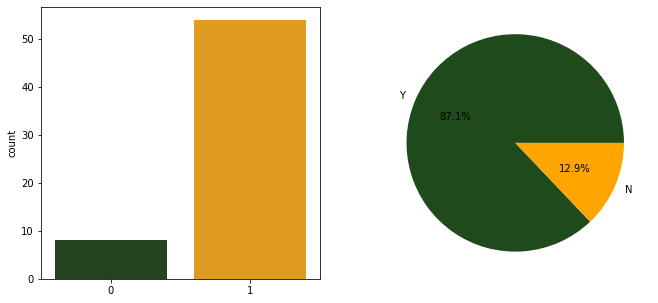

In [ ]:
plot_graph(preds)

Отже, отримали, що ймовірність схвалення банком клієнта на отримання позики складає **87.1%**. Ця ймовірність була спрогнозована за допомогою нашої моделі. 

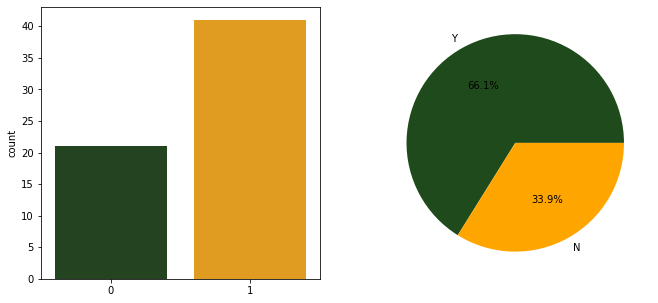

In [ ]:
plot_graph(y_valid)

А насправді ця ймовірність є нижчою - **66.1%**. Це випливає через неточність побудованої моделі та невеликої кількості прикладів у нашому наборі даних.

#  6. Загальна точність моделі

Визначимо основні показники, які використовуватимемо для оцінки моделей класифікації. Узагальнимо нашу модель «прогнозування позики» за допомогою **матриці невідповідностей** 2x2, яка відображає всі чотири можливі результати:

In [ ]:
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix2(cm, classes,
                          title='Матриця невідповідностей',
                          cmap=plt.cm.Blues):
    """
    This function plots the confusion matrix.
        cm(array): confusion matrix
        classes(dictionary): classes of our target (key=categorical type, value=numerical type)
    """
    plt.figure(figsize=(10,7))
    plt.grid(False)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))

    plt.xticks(tick_marks, [f"{value}={key}" for key , value in classes.items()], rotation=45)
    plt.yticks(tick_marks, [f"{value}={key}" for key , value in classes.items()])
    names = ['Істинно негативний', 'Хибно позитивний', 'Хибно негативний', 'Істинно позитивний']

    thresh = cm.max() / 2.
    for k, (i,j) in enumerate(itertools.product(range(cm.shape[0]), range(cm.shape[1]))):
        plt.text(j, i, f"{names[k]}\n{cm[i,j]}\n{cm[i,j]/np.sum(cm)*100:.2f}%",
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    
    plt.ylabel('Насправді')
    plt.xlabel('Прогнозовані результати')
    plt.tight_layout()
    plt.show()

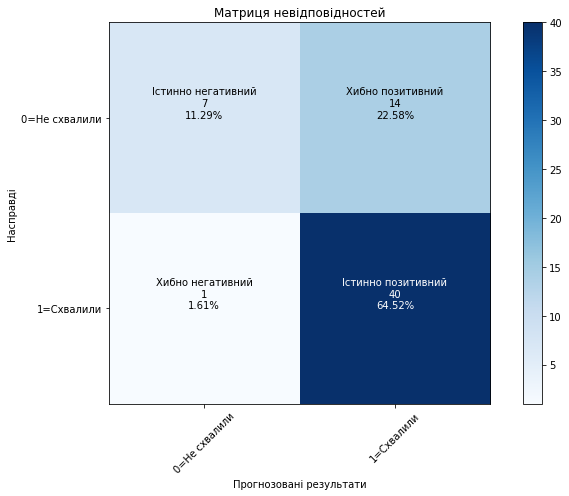

In [ ]:
cm = confusion_matrix(y_valid, preds)
plot_confusion_matrix2(cm=cm, classes={'Не схвалили':0, 'Схвалили':1}, )

### Акуратність

**Акуратність** (accuracy) є одним з метрик для оцінки моделей класифікації

$$
\text{Акуратність} = \frac{\text{Кількість правильних прогнозів}}{\text{Загальна кількість прогнозів}}
$$

Для бінарної класифікації акуратність також можна розрахувати з точки зору позитивних і негативних показників таким чином:

$$
\text{Accuracy} = \frac{TP+TN}{TP+TN+FP+FN}
$$

Де TP = True Positives (Істинно позитивний), TN = True Negatives (Істинно негативний), FP = False Positives (Хибний позитивний), та FN = False Negatives (Хибний негативний).

$$
\text{Accuracy} = \frac{TP+TN}{TP+TN+FP+FN} = \frac{40+7}{40+7+14+1} \approx 0.76
$$

Акуратність становить 0,76, або 76% (47 правильний прогноз із 62 прикладів). Це означає, що наш класифікатор позик непогано справляється з наданням рішень щодо схвалення на отримання клієнтом позики.

Давайте детальніше проаналізуємо позитивні та негативні сторони, щоб краще зрозуміти ефективність нашої моделі.

Зі 62 прикладів рішень щодо позик 41 є схвальними (40 TP та 1 FN) і 21 є несхвальними (14 TN та 7 FP).

З 41 схвальних рішень модель правильно визначає 40 як правильні. Це добре. Однак із 21 несхвальних рішень модель правильно визначає 14 — не дуже чудовий результат, оскільки 7 із 21 невірних рішень модель схвалила!

Сама по собі акуратність не дає повної інформації, коли ми працюємо з незбалансованим за класом набором даних, як цей, де існує значна різниця між кількістю позитивних і негативних міток.

### Точність

**Точність** (англ. precision) намагається відповісти на таке запитання: "Яка частка позитивних прогнозів була насправді правильною?"

Точність визначається таким чином:
$$
\text{Precision} = \frac{TP}{TP+FP} = \frac{40}{40+14} \approx 0.74
$$

Наша модель має точність 0,74, іншими словами, коли вона передбачає, що рішення є схвальним щодо надання кредиту, це правильно в 74% випадків.

### Повнота

**Повнота** (англ. recall) намагається відповісти на таке запитання: Яка частка фактичних позитивів була визначена правильно?

$$
\text{Recall} = \frac{TP}{TP+FN} = \frac{40}{40 + 1} \approx 0,98
$$

Наша модель має повноту 0,98, іншими словами, вона правильно визначає 98% з усіх схвальних рішень.

Було розроблено різні показники, які залежать як від акуратності, так і від повноти. Наприклад, показник F1.

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, accuracy_score

# Evaluate the model
acc  = accuracy_score(y_valid, preds)
pre  = precision_score(y_valid, preds)
rec  = recall_score(y_valid, preds)
f1   = f1_score(y_valid, preds)
loss = log_loss(y_valid, preds)

print('Accuracy: ', acc)
print('Precision:', pre)
print('Recall:   ', rec)
print('F1 score: ', f1)
print('Log loss: ', loss)

Accuracy:  0.7580645161290323
Precision: 0.7407407407407407
Recall:    0.975609756097561
F1 score:  0.8421052631578947
Log loss:  8.356336133672308


**Перехресне затверджування** (англ. cross-validation) дає точнішу оцінку якості моделі.

In [ ]:
from sklearn.model_selection import cross_val_score

acc_scores = cross_val_score(my_pipeline, X_train, y_train,
                             cv=5,
                             scoring='accuracy')


prec_scores = cross_val_score(my_pipeline, X_train, y_train,
                             cv=5,
                             scoring='precision')

rec_scores = cross_val_score(my_pipeline, X_train, y_train,
                             cv=5,
                             scoring='recall')

f1_scores = cross_val_score(my_pipeline, X_train, y_train,
                            cv=5,
                            scoring='f1')

log_losses = -1 * cross_val_score(my_pipeline, X_train, y_train,
                                  cv=5,
                                  scoring='neg_log_loss')

print("Accuracy score: ", acc_scores.mean())
print("Precision score:", prec_scores.mean())
print("Recall score:   ", rec_scores.mean())
print("F1 score:       ", f1_scores.mean())
print("Log loss:       ", log_losses.mean())

Accuracy score:  0.8006224406224405
Precision score: 0.796765574364289
Recall score:    0.9552973342447026
F1 score:        0.8685401766718448
Log loss:        1.0544849857575207


### ROC-крива та AUC

Крива ROC (крива робочих характеристик приймача) — це графік, що показує якість моделі класифікації за всіх порогів класифікації. Ця крива відображає два параметри:
*  Істиннопозитивний рівень (True Positive Rate)
*  Хибнопозитивний рівень (False Positive Rate)

**Істиннопозитивним рівнем** (TPR) є синонімом повноти, і тому визначається таким чином:
$$ TPR = \frac{TP} {TP + FN} $$

**Хибнопозитивний рівень** (FPR) визначається наступним чином:
$$ FPR = \frac{FP} {FP + TN} $$

Крива ROC відображає співвідношення TPR та FPR за різних порогів класифікації. Зниження порога класифікації дозволяє класифікувати більше елементів як позитивні, тим самим збільшуючи кількість хибно позитивних та істинно позитивних. На наступному малюнку показано криву ROC.

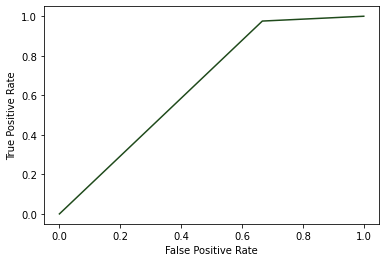

              precision    recall  f1-score   support

           0       0.88      0.33      0.48        21
           1       0.74      0.98      0.84        41

    accuracy                           0.76        62
   macro avg       0.81      0.65      0.66        62
weighted avg       0.79      0.76      0.72        62



In [ ]:
from sklearn.metrics import classification_report, roc_curve, RocCurveDisplay

fpr, tpr, _ = roc_curve(y_valid, preds)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)

roc_display.plot()
plt.show()

print(classification_report(y_valid, preds, ))

Щоб обчислити точки на кривій ROC, ми могли б багато разів оцінити модель логістичної регресії з різними пороговими значеннями класифікації, але це було б неефективно. На щастя, існує ефективний алгоритм на основі сортування, який може надати нам цю інформацію, називається AUC.

AUC означає «Площа під кривою ROC» (англ. «Area under the ROC Curve»). Тобто AUC вимірює всю двовимірну площу під усією кривою ROC від (0,0) до (1,1).

In [ ]:
from sklearn.metrics import auc

print("AUC:", auc(fpr, tpr))

AUC: 0.6544715447154472


##  7. Різне розбиття вхідного набору

Ітеративно перерозбити вхідний набір на навчальну та перевірочну вибірку у різному співвідношенні. Виконати пп. 3-6 на нових вибірках.

In [ ]:
def change_test_size(model, x, y, my_imputer = LabelEncoder()):
    # try to imporve model by changing test_size
    test_sizes= [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]
    acc_table = pd.DataFrame(columns=['test_size', 'ACC_train', 'ACC_test', 'Recall_train', 'Recall_test'])
    for i, test_size in enumerate(test_sizes):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=0, stratify=y)
        y_train = my_imputer.fit_transform(y_train)
        y_test = my_imputer.transform(y_test)
        model.fit(x_train, y_train.ravel())
        y_pred_train = model.predict(x_train)
        y_pred_test = model.predict(x_test)
        acc_test_i = accuracy_score(y_test, y_pred_test)
        acc_train_i = accuracy_score(y_train, y_pred_train)
        rec_test_i = recall_score(y_test, y_pred_test)
        rec_train_i = recall_score(y_train, y_pred_train)
        acc_table.loc[len(acc_table.index)] = [str(test_size), acc_train_i, acc_test_i, rec_train_i, rec_test_i]
    return acc_table.sort_values(by=['Recall_test'], ascending=False).style.background_gradient(cmap='summer_r')

In [ ]:
change_test_size(my_pipeline, X, y)

,test_size,ACC_train,ACC_test,Recall_train,Recall_test
2,0.2,0.804481,0.804878,0.967359,0.964706
3,0.25,0.791304,0.818182,0.952532,0.962264
0,0.1,0.797101,0.822581,0.960422,0.953488
6,0.4,0.796196,0.804878,0.952569,0.946746
5,0.35,0.791980,0.809302,0.952555,0.939189
1,0.15,0.800384,0.795699,0.963687,0.937500
4,0.3,0.794872,0.800000,0.949153,0.937008


Чи вдалось покращити результати прогнозування?

*  Так, модель вийшло покращити.

На скільки?

*  Акуратність покращилася на тисячні значення після коми, а повнота на соте значення після коми (один відсоток).

Яке оптимальне розбиття? Встановити оптимальне співвідношення начальної та перевірочної вибірки для отримання найвищої загальної точності та/або помилок 1-го та 2-го роду або вищої якості моделі.

*  В якості оптимально розбиття для навчальної вибірки використовуємо 80% даних, а для перевірки якості моделі використати 20% вибірки.